# Support Vector Machines - SVM
## Laboratorio 3

## [Fraude en el Vino](https://en.wikipedia.org/wiki/Wine_fraud)

El fraude en el vino se relaciona a los aspectos comerciales del vino.  El tipo más prevalente de fraude es aquel en el cual los vinos son adulterados, generalmente con la adición de productos más baratos (e.g. jugos) y, a veces, con químicos dañinos y endulcorantes (para compensar el color o sabor).

La falsificación y la re-etiquetación de vinos inferiores y más baratos haciéndolos parecer marcas más caras es otro tipo común de fraude con vino.

## Objetivos del Laboratorio

Una compañía distribuidora, que recientemente fue víctima de fraude, ha completado una auditoría de varias muestras de vino a través del uso de análisis químico.  La compañía se especializa en la exportación de vinos de una calidad extremadamente alta y muy valiosos.  El fraude fue cometido por un proveedor que intentó pasar vinos baratos, de calidad inferior, como vinos de más alta gama.  La compañía distribuidora los ha contratado a Ustedes para intentar crear un modelo de aprendizaje de máquina (ML) que pueda ayudar a detectar muestras de vino de calidad baja ("fraude").  Quieren saber si siquiera es posible detectar tal diferencia.  


Fuente de datos: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**La meta general es utilizar el conjunto de datos adjunto para desarrollar un modelo que intenta predecir si un vino es legítimo "Legit" o fraudulento "Fraud" basado en varias características químicas.**

---
---

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos

**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar el de mejor rendimiento
        
**(14 puntos) Hallazgos y conclusiones.**
* Hace la recomendación correcta para la Compañía Distribuidora

**NOTA:  Al usar SVC, anteriormente hemos dejado el modelo en blanco, (e.g. sin parámeteros).  Sin embargo, en estos datos las clases no están balanceadas.  Para intentar remediar este problema, podemos ajustar automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos con una llamada en la invocación de SVC().  Ver la [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en-línea y averiguen cuál es el argumento\parámetro.**

---------------------------------------------------------------------------------------------------

## **Analisis Explotatorio**

1. Identifica el tipo de archivo .data y la forma de leerlo

El tipo de data es un archivo csv por loque se uso el método read_csv de la libreria de pandas. También se obtienen las primeras filas del dataframe.

In [2]:
import pandas as pd

# Cargar el archivo CSV en un dataframe
data = pd.read_csv('wine_fraud.csv')

# Mostrar las primeras filas del dataframe
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9

2.Estudia las variables cuantitativas mediante técnicas de estadística descriptiva

Las variables cuantitativas en este conjunto de datos es son fixed acidity, volatile acidity, ctric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, ph, suphates y alchohol. Estas variables son características de los vinos y son relevantes para evualar su calidad y en este caso, evaluar si fue eleborado con productos de mala calidad, haciendo un vino fraudulento. 

Para comprender mejor estas caracteristicas, realizamos estadísicas describiras para obtener la media, desvación estander, maximo, minimo y otros datos relevantes para el presente análisis. 

In [3]:
# Obtener estadísticas descriptivas de las variables cuantitativas
quant_vars = data.select_dtypes(include='number')
desc_stats = quant_vars.describe()

# Imprimir las estadísticas descriptivas
print(desc_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

3. Hacer gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos

Se realizo un histograma de la variable fixed acidity y se puede observar como la acidez del vino tiende estar entre 6 y 8. Asimimso gracias al histograma de volatile acidtiy, se puede ver como la acidez volatil del vino tiende a tener un valor entre 0.2 y 0.4. El histograma del citric acid muestra que el acido citrico de un vino mayormente tiene un valor aproximado de 0.3. El cloruro es responsable de el toque salado de los vinos, que refuerza su sabor. Segun el histograma realizado, este tiene un valor entre 0 y 0.1. Posteriormente se realizo el hisograma de la variable free sulfur dioxide, la cual muestra que tiene frecuentemente un valor aproximado de 25. Asimismo, la variable de densidad tienen un valor casi siempre entre 0.9 y 1. El hisotrigrama del pH muestra una mayoria de valores entre 3.1 y 3.3. Esto tiene sentido pues los vinos blancos suelen presentar un pH de 3 y 3,3 mientras que la mayoría de los tintos suelen estar entre 3,3 y 3,6. Finalmente el histograma de la variable de alcohol muestra una tendencia de valores entre 9 y 10. Este dato tambien tiene sentido pues el vino tiende a tener una graduación alcohólica entre 8 y 13. 

Gracias a los diagrama de caja y bigotes pudimos obtener también las siguientes conclusiones:
1. El vino legitimo tiene una menor cantidad de azucares reisduales en promedio. 
2. 


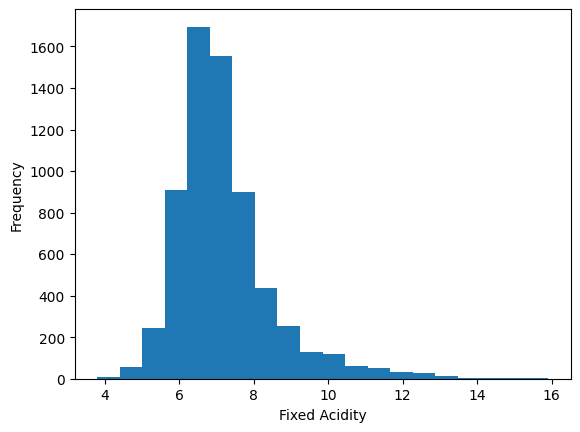

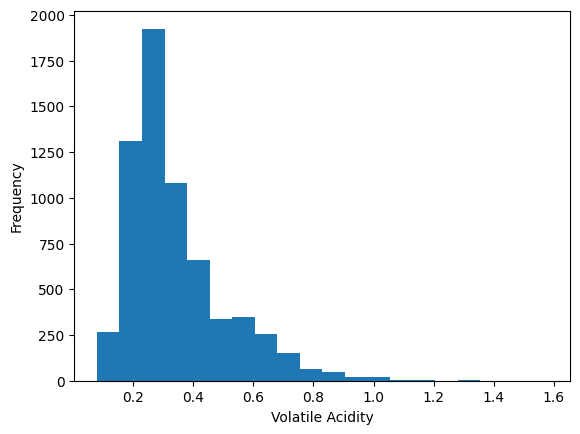

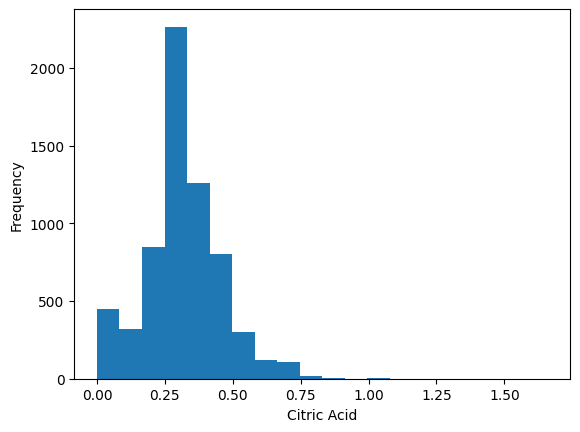

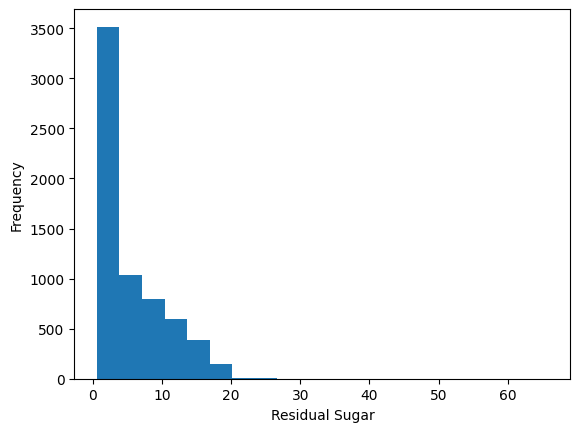

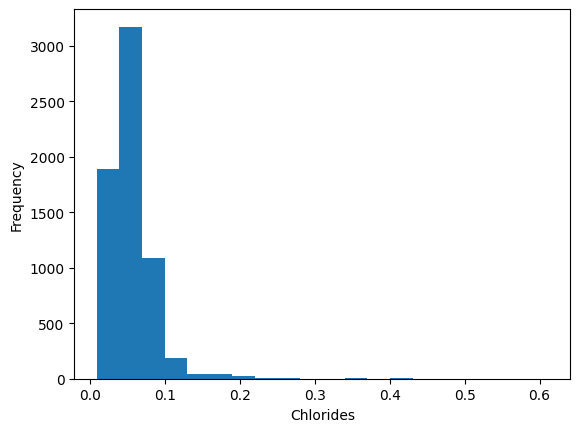

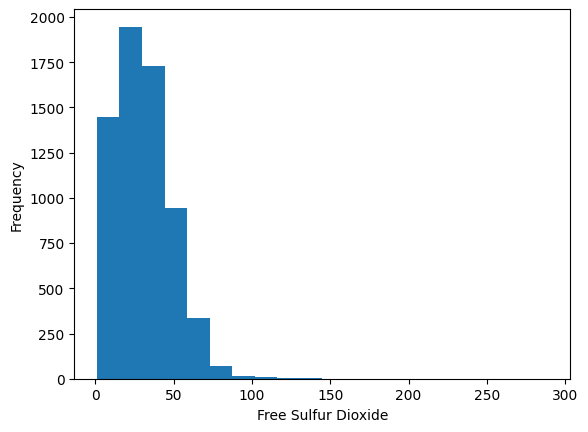

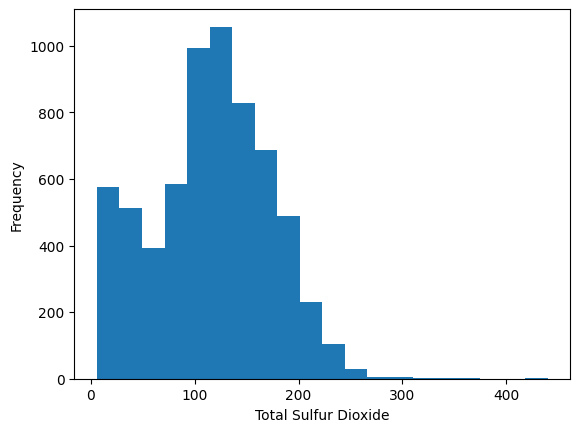

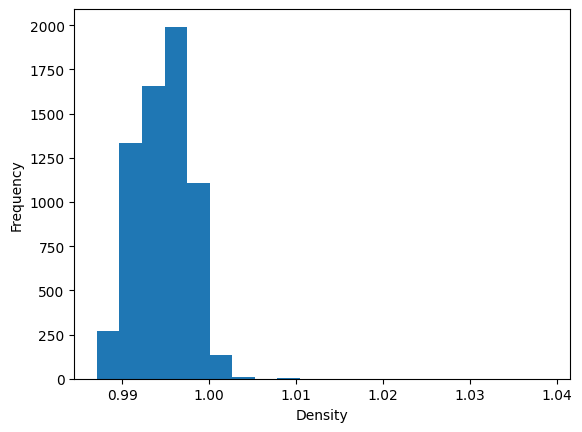

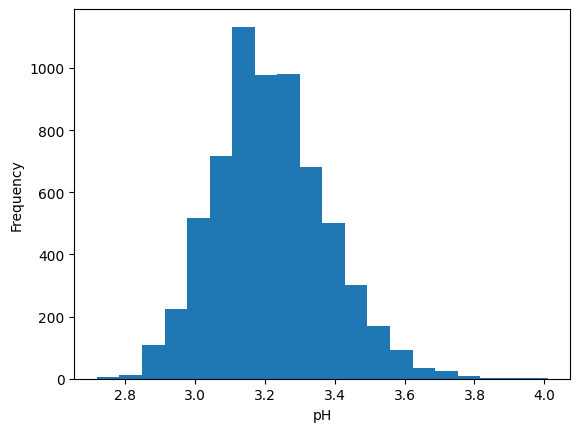

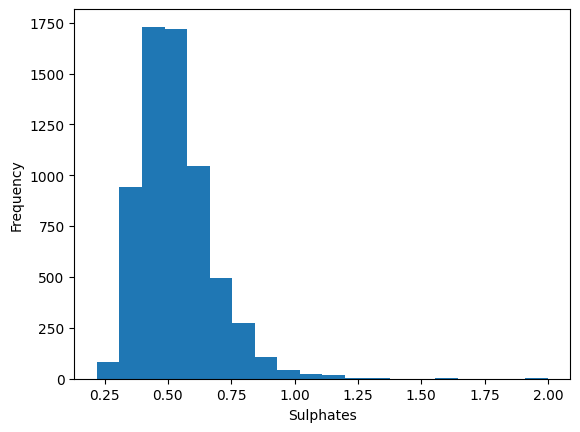

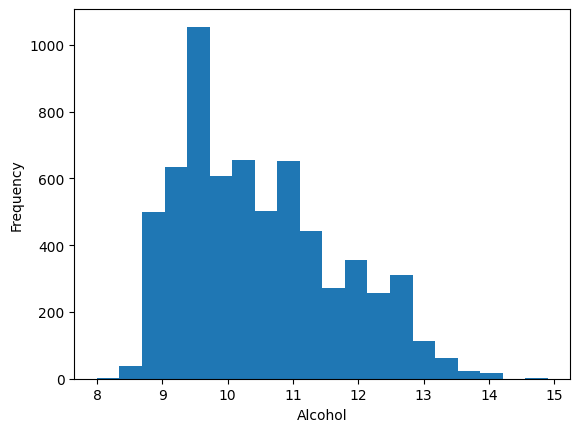

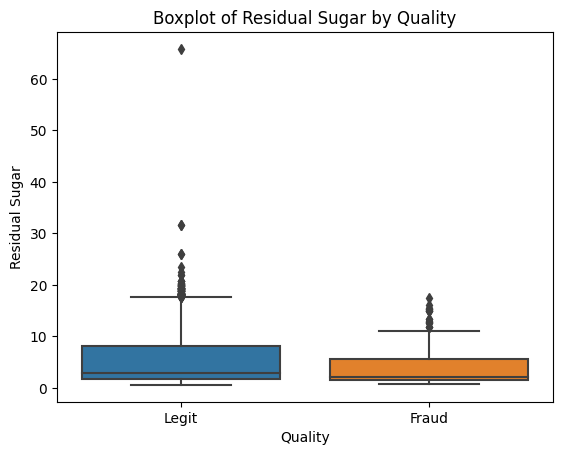

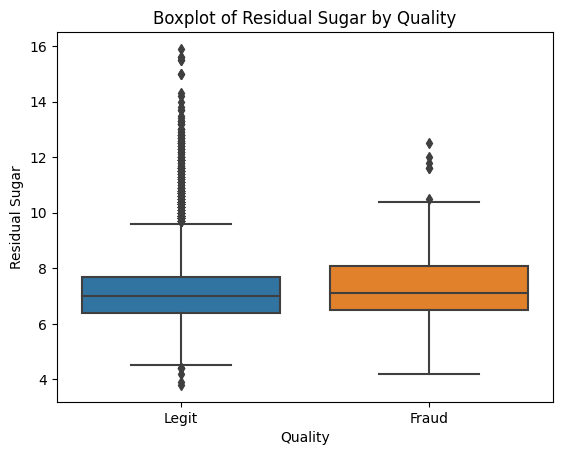

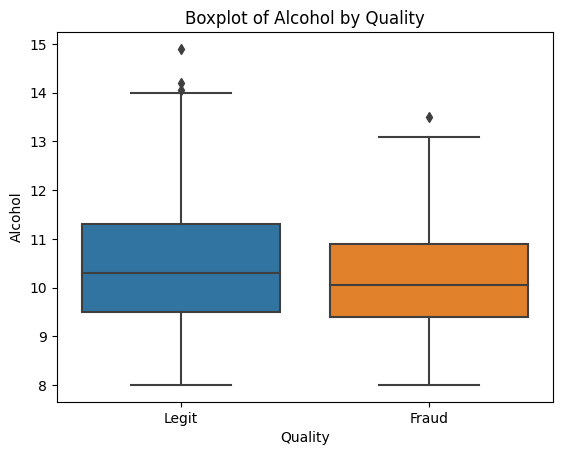

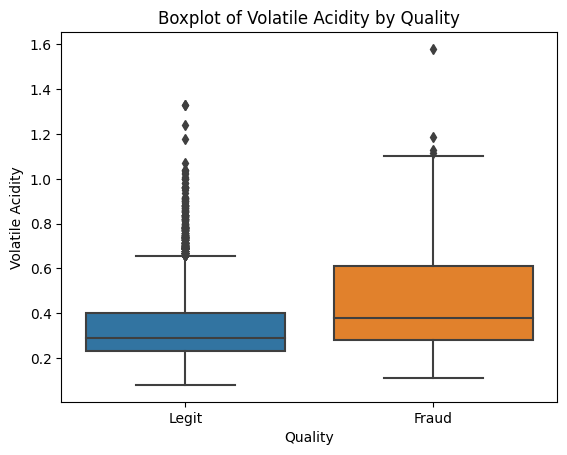

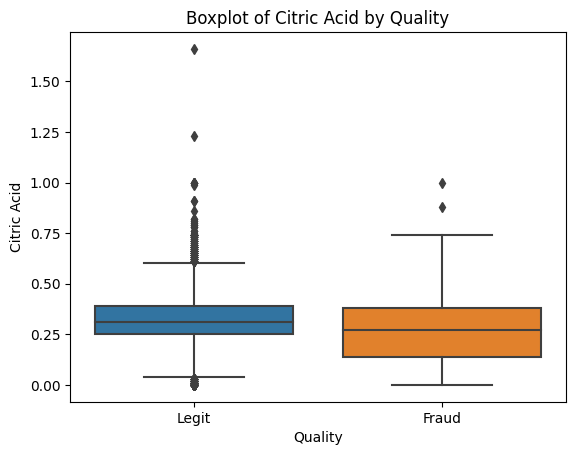

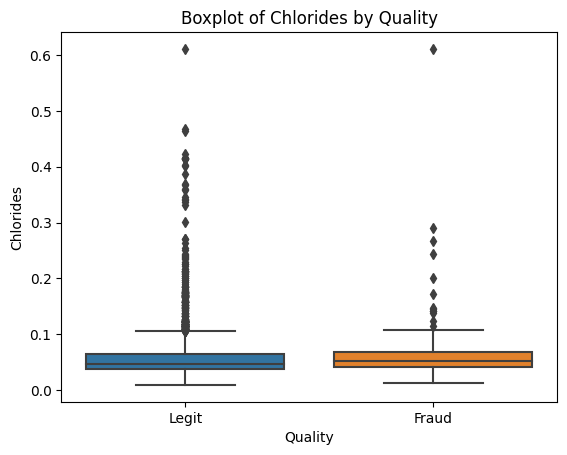

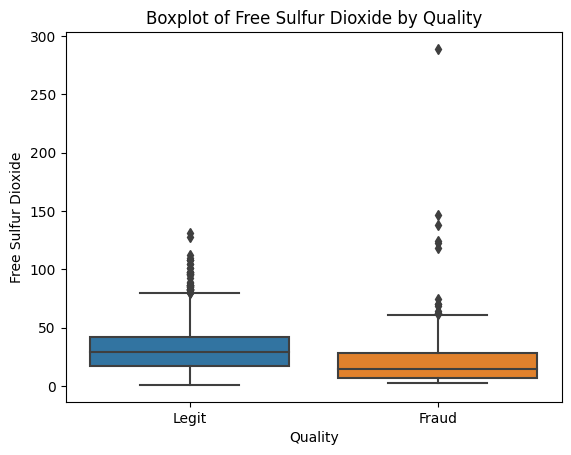

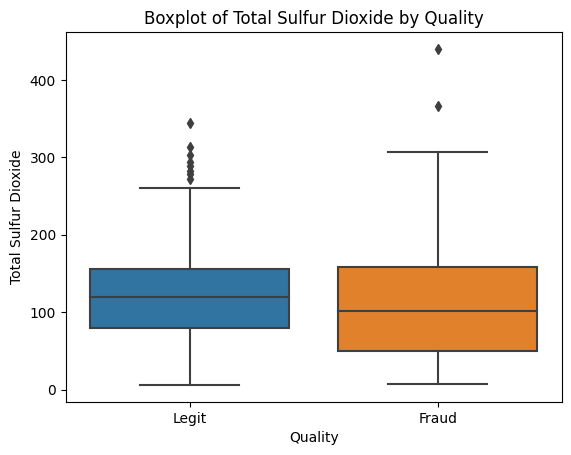

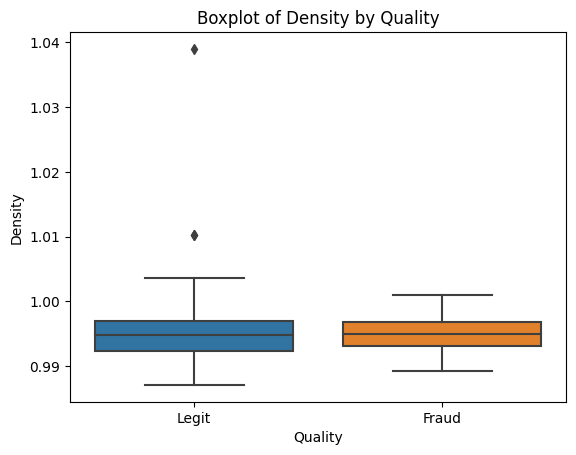

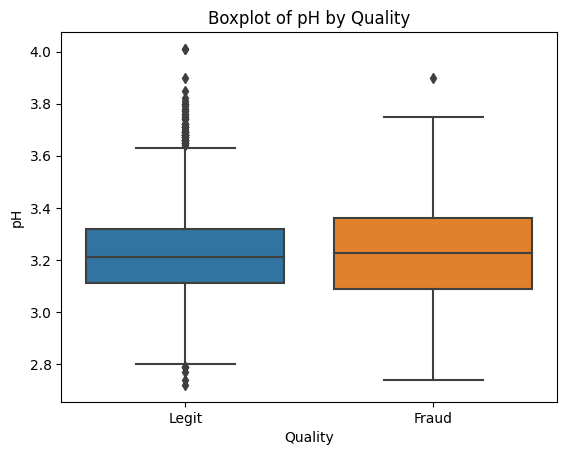

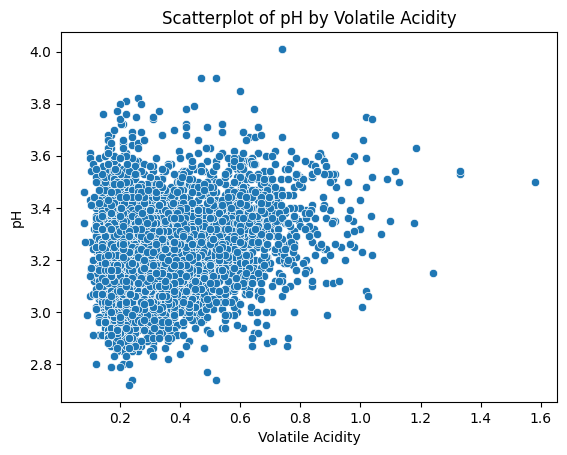

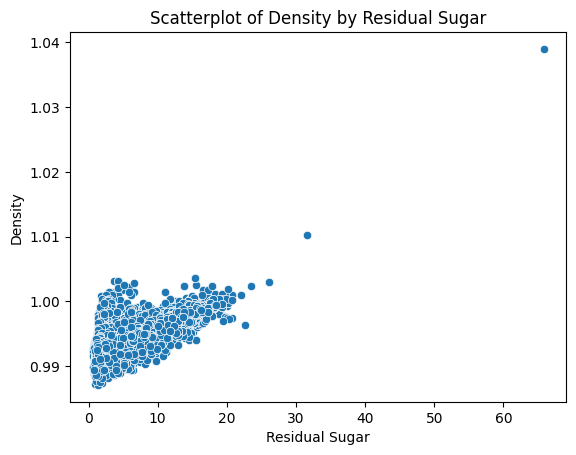

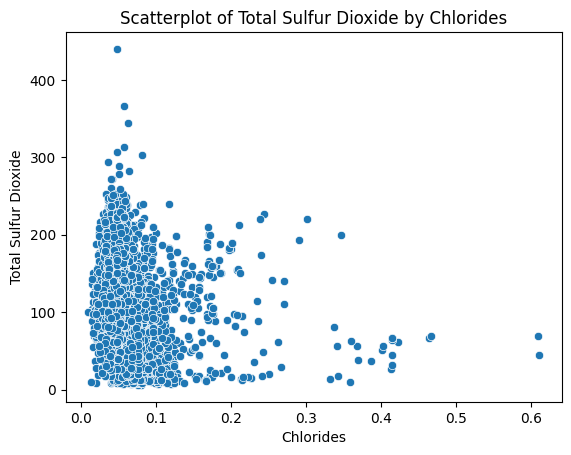

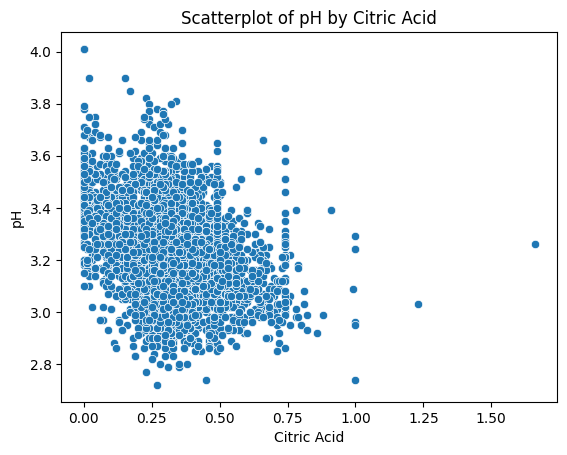

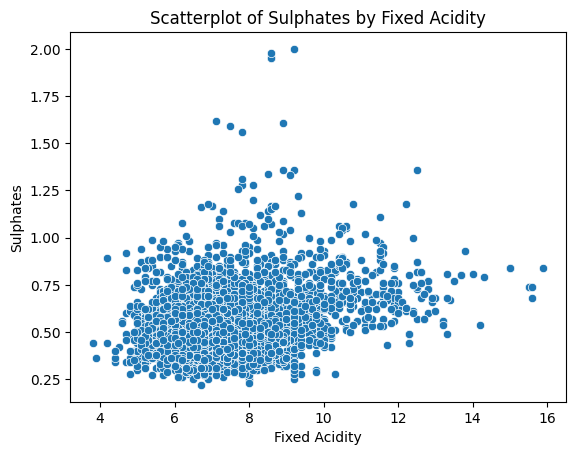

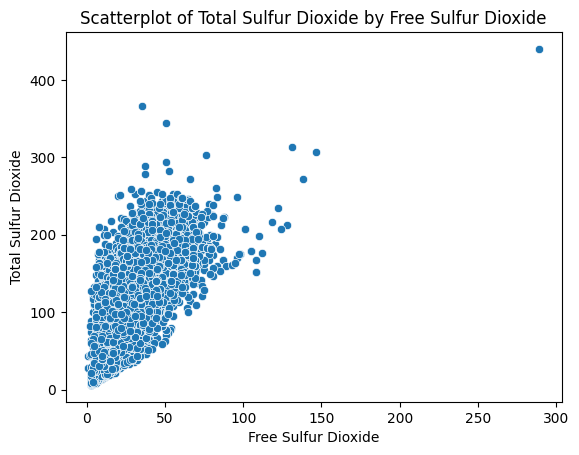

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la variable "fixed acidity"
plt.hist(data['fixed acidity'], bins=20)
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "volatile acidity"
plt.hist(data['volatile acidity'], bins=20)
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "citric acid"
plt.hist(data['citric acid'], bins=20)
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "residual sugar"
plt.hist(data['residual sugar'], bins=20)
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "chlorides"
plt.hist(data['chlorides'], bins=20)
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "free sulfur dioxide"
plt.hist(data['free sulfur dioxide'], bins=20)
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "total sulfur dioxide"
plt.hist(data['total sulfur dioxide'], bins=20)
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "density"
plt.hist(data['density'], bins=20)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "pH"
plt.hist(data['pH'], bins=20)
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "sulphates"
plt.hist(data['sulphates'], bins=20)
plt.xlabel('Sulphates')
plt.ylabel('Frequency')
plt.show()

# Histograma de la variable "alcohol"
plt.hist(data['alcohol'], bins=20)
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


# Graficar un diagrama de caja y bigotes de la variable "residual sugar" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.title('Boxplot of Residual Sugar by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "fixed acidity" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.title('Fixed Acidity Sugar by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "alcohol" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Boxplot of Alcohol by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "volatile acidity" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Boxplot of Volatile Acidity by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "citric acid" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['citric acid'])
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.title('Boxplot of Citric Acid by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "chlorides" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['chlorides'])
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.title('Boxplot of Chlorides by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "free sulfur dioxide" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['free sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Boxplot of Free Sulfur Dioxide by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "total sulfur dioxide" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Boxplot of Total Sulfur Dioxide by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "density" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['density'])
plt.xlabel('Quality')
plt.ylabel('Density')
plt.title('Boxplot of Density by Quality')
plt.show()


# Graficar un diagrama de caja y bigotes de la variable "pH" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['pH'])
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Boxplot of pH by Quality')
plt.show()

#Graficar un grafico de dispersion de la variable "volatile acidity" por la variable "pH"
# El ácido volátil de un vino puede afectar su pH y, por lo tanto, su sabor y aroma.
sns.scatterplot(x=data['volatile acidity'], y=data['pH'])
plt.xlabel('Volatile Acidity')
plt.ylabel('pH')
plt.title('Scatterplot of pH by Volatile Acidity')
plt.show()

#Graficar un grafico de dispersion de la variable "residual sugar" por la variable "density"
#La cantidad de azúcar residual en un vino puede afectar su densidad y textura.
sns.scatterplot(x=data['residual sugar'], y=data['density'])
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.title('Scatterplot of Density by Residual Sugar')
plt.show()

#Graficar un grafico de dispersion de la variable "chlorides" por la variable "total sulfur dioxide"
#Los niveles de cloruros y dióxido de azufre total en un vino pueden estar relacionados con su sabor y aroma.
sns.scatterplot(x=data['chlorides'], y=data['total sulfur dioxide'])
plt.xlabel('Chlorides')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Scatterplot of Total Sulfur Dioxide by Chlorides')
plt.show()

#Graficar un grafico de dispersion de la variable "citric acid" por la variable "pH"
#El ácido cítrico en un vino puede afectar su pH y sabor.
sns.scatterplot(x=data['citric acid'], y=data['pH'])
plt.xlabel('Citric Acid')
plt.ylabel('pH')
plt.title('Scatterplot of pH by Citric Acid')
plt.show()

#Graficar un grafico de dispersion de la variable "fixed acidity" por la variable "sulphates"
#Los niveles de ácido fijo y sulfatos en un vino pueden estar relacionados con su acidez y sabor.
sns.scatterplot(x=data['fixed acidity'], y=data['sulphates'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Sulphates')
plt.title('Scatterplot of Sulphates by Fixed Acidity')
plt.show()

#Graficar un grafico de dispersion de la variable "free sulfur dioxide" por la variable "total sulfur dioxide"
# Los niveles de dióxido de azufre libre y total en un vino pueden estar relacionados con su capacidad para mantenerse fresco y protegerse contra la oxidación.
sns.scatterplot(x=data['free sulfur dioxide'], y=data['total sulfur dioxide'])
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Scatterplot of Total Sulfur Dioxide by Free Sulfur Dioxide')
plt.show()



4.Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.

c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


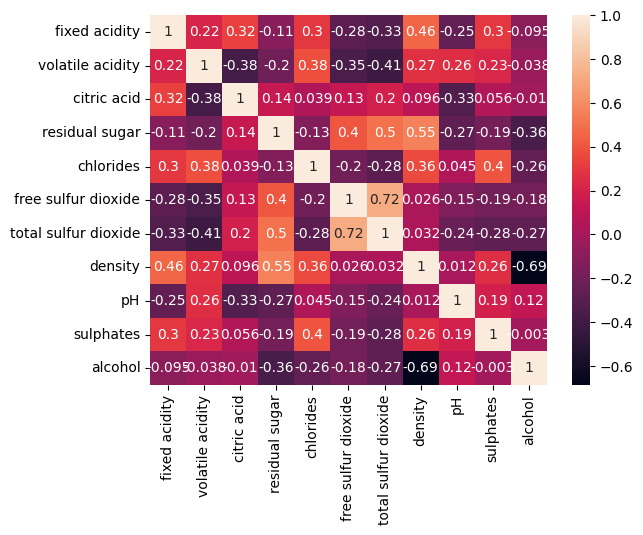

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 66.82it/s]


In [5]:
from pandas_profiling import ProfileReport

# separar las variables numéricas y categóricas
num_vars = data.select_dtypes(include=['int', 'float'])
cat_vars = data.select_dtypes(exclude=['int', 'float'])

# matriz de correlación númericas
sns.heatmap(num_vars.corr(), annot=True)
plt.show()

#pandas profiling report
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_file("report.html")


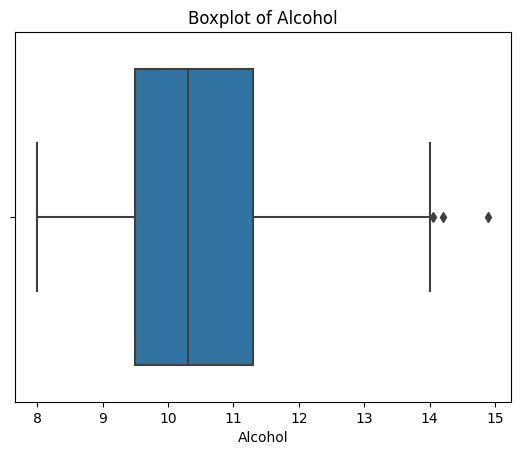

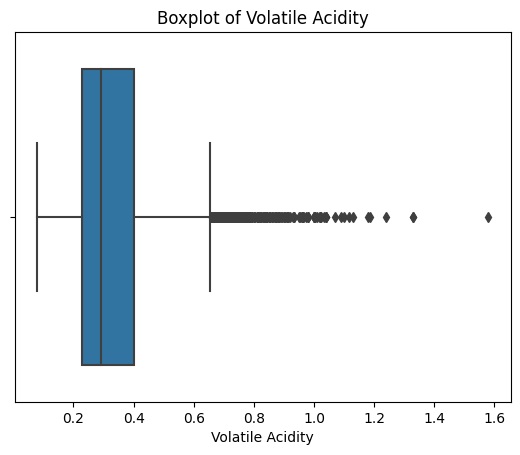

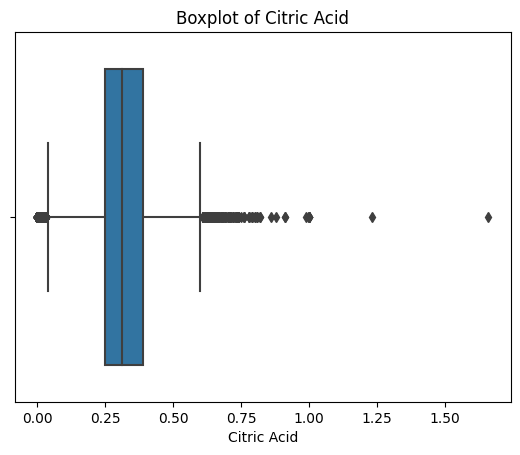

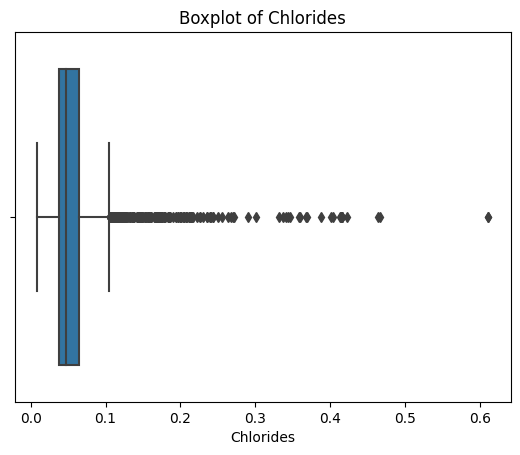

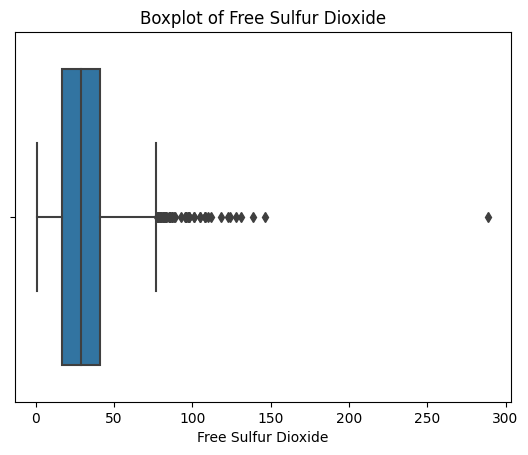

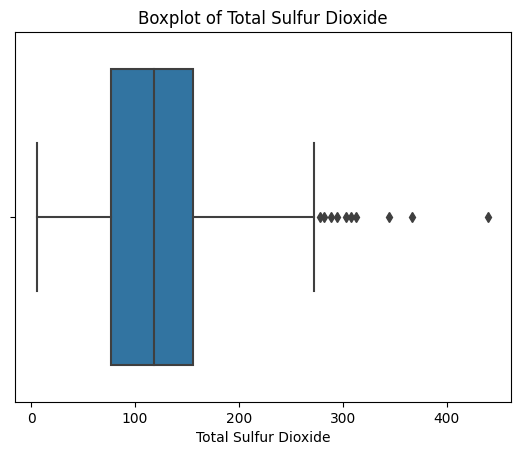

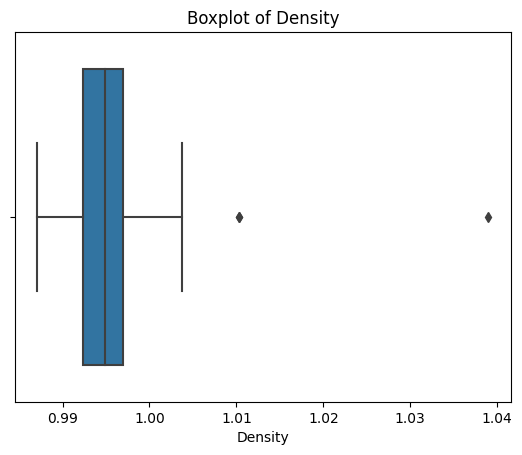

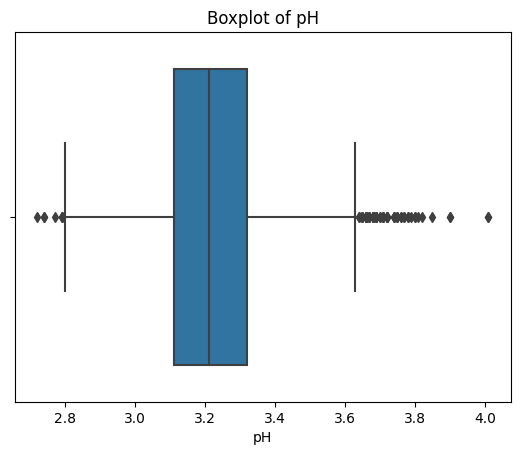

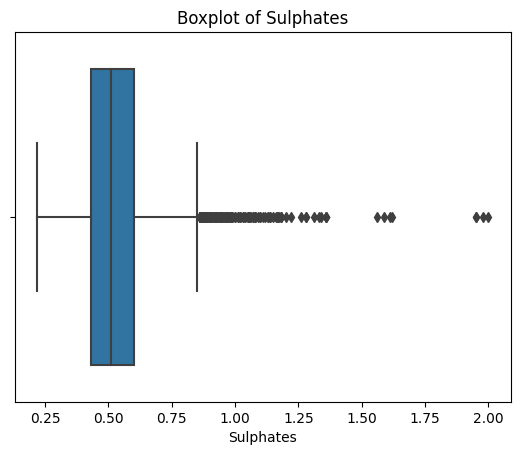

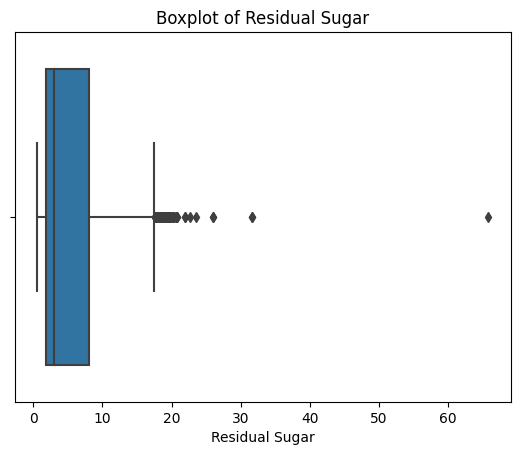

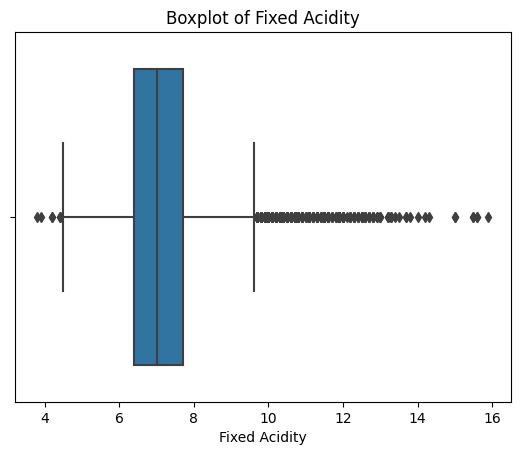

In [6]:
#identificar datos atipicos

# Graficar un diagrama de caja y bigotes de la variable "alcohol"
sns.boxplot(x=data['alcohol'])
plt.xlabel('Alcohol')
plt.title('Boxplot of Alcohol')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "volatile acidity"
sns.boxplot(x=data['volatile acidity'])
plt.xlabel('Volatile Acidity')
plt.title('Boxplot of Volatile Acidity')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "citric acid"
sns.boxplot(x=data['citric acid'])
plt.xlabel('Citric Acid')
plt.title('Boxplot of Citric Acid')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "chlorides"
sns.boxplot(x=data['chlorides'])
plt.xlabel('Chlorides')
plt.title('Boxplot of Chlorides')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "free sulfur dioxide"
sns.boxplot(x=data['free sulfur dioxide'])
plt.xlabel('Free Sulfur Dioxide')
plt.title('Boxplot of Free Sulfur Dioxide')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "total sulfur dioxide"
sns.boxplot(x=data['total sulfur dioxide'])
plt.xlabel('Total Sulfur Dioxide')
plt.title('Boxplot of Total Sulfur Dioxide')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "density"
sns.boxplot(x=data['density'])
plt.xlabel('Density')
plt.title('Boxplot of Density')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "pH"
sns.boxplot(x=data['pH'])
plt.xlabel('pH')
plt.title('Boxplot of pH')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "sulphates"
sns.boxplot(x=data['sulphates'])
plt.xlabel('Sulphates')
plt.title('Boxplot of Sulphates')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "residual sugar"
sns.boxplot(x=data['residual sugar'])
plt.xlabel('Residual Sugar')
plt.title('Boxplot of Residual Sugar')
plt.show()


# Graficar un diagrama de caja y bigotes de la variable "fixed acidity"
sns.boxplot(x=data['fixed acidity'])
plt.xlabel('Fixed Acidity')
plt.title('Boxplot of Fixed Acidity')
plt.show()



**** FALTA ANALISIS DE DATOS ATIPICOS

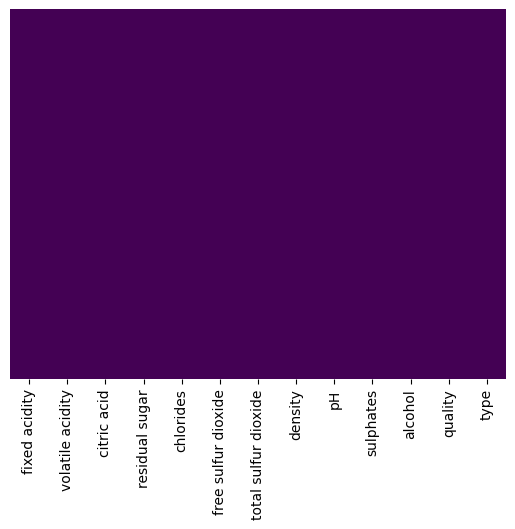

In [7]:
#analizar datos faltantes
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#reemplazar datos faltantes por la media de la columna
data['fixed acidity'].fillna(data['fixed acidity'].mean(), inplace=True)
data['volatile acidity'].fillna(data['volatile acidity'].mean(), inplace=True)
data['citric acid'].fillna(data['citric acid'].mean(), inplace=True)
data['residual sugar'].fillna(data['residual sugar'].mean(), inplace=True)
data['chlorides'].fillna(data['chlorides'].mean(), inplace=True)
data['free sulfur dioxide'].fillna(data['free sulfur dioxide'].mean(), inplace=True)
data['total sulfur dioxide'].fillna(data['total sulfur dioxide'].mean(), inplace=True)
data['density'].fillna(data['density'].mean(), inplace=True)
data['pH'].fillna(data['pH'].mean(), inplace=True)
data['sulphates'].fillna(data['sulphates'].mean(), inplace=True)
data['alcohol'].fillna(data['alcohol'].mean(), inplace=True)


5. Estudia las variables categóricas

In [8]:
#FALTAAAAAAAAAAAAAAAAAAAA

6. Elabora gráficos de barra, tablas de frecuencia y de proporciones


****************************
 quality 		Frecuencia 
****************************
Legit    6251
Fraud     246
Name: quality, dtype: int64

****************************
 type 		Frecuencia 
****************************
white    4898
red      1599
Name: type, dtype: int64

****************************
 quality 		Proporción 
****************************
Legit    0.962136
Fraud    0.037864
Name: quality, dtype: float64

****************************
 type 		Proporción 
****************************
white    0.753886
red      0.246114
Name: type, dtype: float64


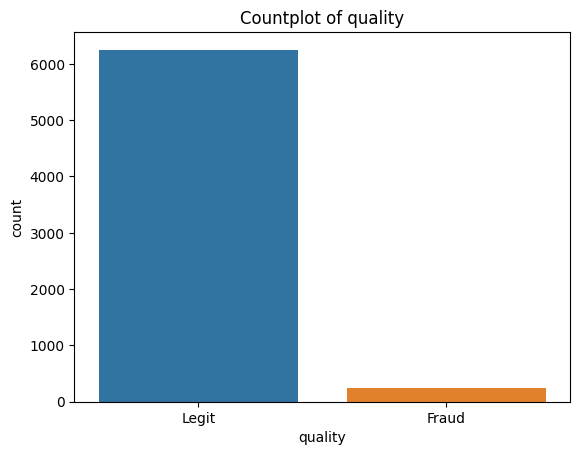

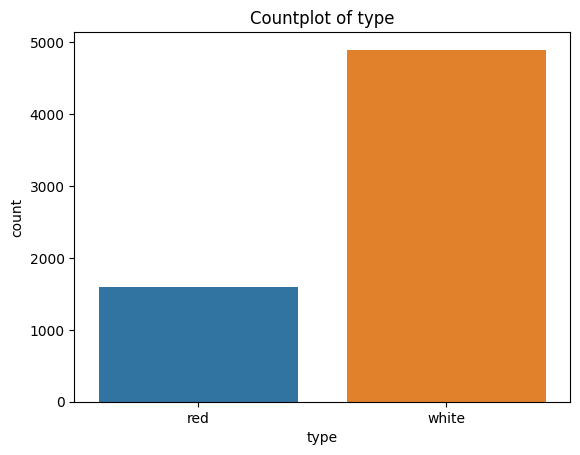

In [9]:
categoricas = ['quality', 'type']

# tablas de frecuencia variables categoricas
for col in categoricas:
    print("\n****************************\n",col,"\t\tFrecuencia","\n****************************")
    print(data[col].value_counts())

#tabla de proporciones
for col in categoricas:
    print("\n****************************\n",col,"\t\tProporción","\n****************************")
    print(data[col].value_counts(normalize=True))

#graficar variables categoricas
for col in categoricas:
    sns.countplot(x=data[col])
    plt.xlabel(col)
    plt.title('Countplot of {}'.format(col))
    plt.show()


## **Clasificacion**

In [10]:
#Regresion logistica Simple
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

X = data[["fixed acidity","volatile acidity","citric acid","residual sugar", "chlorides" ,"free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
Y = data["quality"]

#dividir el dataset en conjunto de entrenamiento y conjunto de testing
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, Y, test_size = 0.25, random_state = 0)

n = Counter(y_entreno)
ratio = int(n['Fraud']/n['Legit'])

modeloLog = LogisticRegression(max_iter = 500, class_weight = {'Legit':1, 'Fraud':ratio})
modeloLog.fit(X_entreno,y_entreno)

predicciones = modeloLog.predict(X_prueba)
print(classification_report(y_prueba, predicciones))
confusion_matrix(y_prueba,predicciones)
accuracy_score(y_prueba, predicciones)


              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        65
       Legit       0.96      1.00      0.98      1560

    accuracy                           0.96      1625
   macro avg       0.48      0.50      0.49      1625
weighted avg       0.92      0.96      0.94      1625



c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

0.96

CON K = 15

Matriz de Confusión

[[   0   65]
 [   0 1560]]


              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        65
       Legit       0.96      1.00      0.98      1560

    accuracy                           0.96      1625
   macro avg       0.48      0.50      0.49      1625
weighted avg       0.92      0.96      0.94      1625



c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

0.96

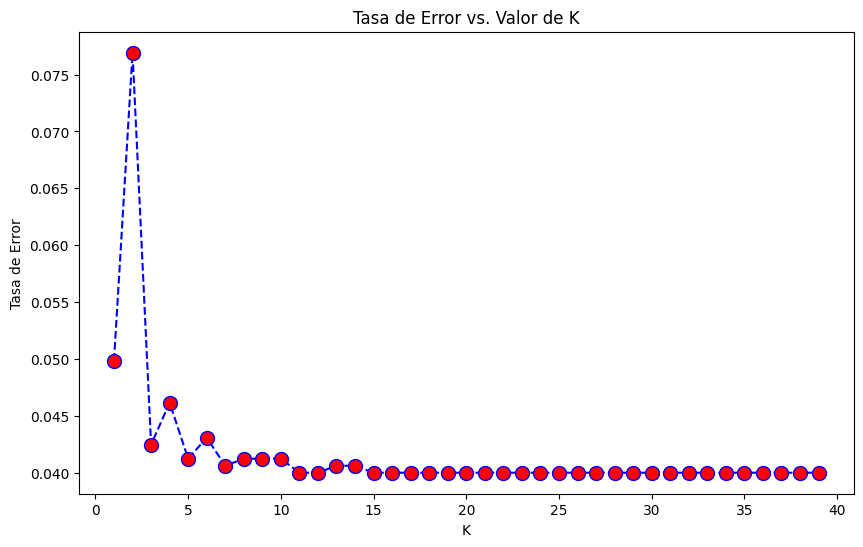

In [11]:
# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

tasa_error = []

# Puede tardar un poco
for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_entreno, y_entreno)
    pred_i = knn.predict(X_prueba)
    tasa_error.append(np.mean(pred_i != y_prueba))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), tasa_error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')


knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_entreno,y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 15')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))


accuracy_score(y_prueba, pred)

In [12]:
# SVM (Support Vector Machine)
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

clasificador = SVC(kernel = 'linear', random_state = 0)
clasificador.fit(X_entreno, y_entreno)

y_pred = clasificador.predict(X_prueba)

print(classification_report(y_prueba, y_pred))
print(confusion_matrix(y_prueba,y_pred))
print(accuracy_score(y_prueba, y_pred))


              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        65
       Legit       0.96      1.00      0.98      1560

    accuracy                           0.96      1625
   macro avg       0.48      0.50      0.49      1625
weighted avg       0.92      0.96      0.94      1625

[[   0   65]
 [   0 1560]]
0.96


c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Kernel SVM 
modelo = SVC(kernel = 'rbf', C = 1)
modelo.fit(X, Y)
y_predict = modelo.predict(X_prueba)

print(classification_report(y_prueba, y_predict))
print(confusion_matrix(y_prueba,y_predict))
print(accuracy_score(y_prueba, y_predict))

#Sigmoide
modelo = SVC(kernel = 'sigmoid')
modelo.fit(X, Y)
y_predict = modelo.predict(X_prueba)

print(classification_report(y_prueba, y_predict))
print(confusion_matrix(y_prueba,y_predict))
print(accuracy_score(y_prueba, y_predict))

#Polinomial
modelo = SVC(kernel = 'poly', C = 1, degree = 1)
modelo.fit(X, Y)
y_predict = modelo.predict(X_prueba)

print(classification_report(y_prueba, y_predict))
print(confusion_matrix(y_prueba,y_predict))
print(accuracy_score(y_prueba, y_predict))

#Gamma
modelo = SVC(kernel = 'rbf', C = 1, gamma = 0.01)
modelo.fit(X, Y)
y_predict = modelo.predict(X_prueba)

print(classification_report(y_prueba, y_predict))
print(confusion_matrix(y_prueba,y_predict))
print(accuracy_score(y_prueba, y_predict))

#Grid Search
svm = SVC()
malla_parametros = {'C':[0.01, 0.1, 1],'kernel':['linear', 'rbf']}
malla = GridSearchCV(svm, malla_parametros)
malla.fit(X, Y)
malla.best_score_
malla.best_params_





c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        65
       Legit       0.96      1.00      0.98      1560

    accuracy                           0.96      1625
   macro avg       0.48      0.50      0.49      1625
weighted avg       0.92      0.96      0.94      1625

[[   0   65]
 [   0 1560]]
0.96
              precision    recall  f1-score   support

       Fraud       0.10      0.08      0.09        65
       Legit       0.96      0.97      0.97      1560

    accuracy                           0.94      1625
   macro avg       0.53      0.52      0.53      1625
weighted avg       0.93      0.94      0.93      1625

[[   5   60]
 [  43 1517]]
0.9366153846153846


c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\carev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        65
       Legit       0.96      1.00      0.98      1560

    accuracy                           0.96      1625
   macro avg       0.48      0.50      0.49      1625
weighted avg       0.92      0.96      0.94      1625

[[   0   65]
 [   0 1560]]
0.96
              precision    recall  f1-score   support

       Fraud       1.00      0.03      0.06        65
       Legit       0.96      1.00      0.98      1560

    accuracy                           0.96      1625
   macro avg       0.98      0.52      0.52      1625
weighted avg       0.96      0.96      0.94      1625

[[   2   63]
 [   0 1560]]
0.9612307692307692


{'C': 0.01, 'kernel': 'linear'}

## **Hallazgos y Conclusiones**
Al analizar los datos sobre los proveedores de vinos, se puede observar que hay ciertas características que evidencian si un vino es legítimo o es simplemente un fraude. Aunque la botella pueda pretender ser un vino mucho más caro, los contenidos de esta siguen siendo vino barato, lo cual significa que no tiene las características esperadas por el costo del producto. Algunas de estas características son: el ácido cítrico, el azucar residual, y el pH del vino. Las diferencias pueden ser sutiles, pero al analizar todos estos valores en conjunto, se pueden encontrar patrones que permiten determinar si el vino es legítimo o un fraude. Es importante utilizar estas características objetivas, ya que el sabor no es un buen indicador de si el vino es un fraude o no. Esto se debe a que el sabor de un vino es en gran parte subjetivo, a diferencia de las otras variables cuantificables que son objetivas. Al crear un modelo analizando las características de los vinos, se logró determinar con una exactitud de 0.96 si el vino es un fraude o no. Basado en este alto nivel de exactitud, la empresa puede utilizar este modelo para determinar si el vino que van a comprar es genuino antes de realizar la compra. Para futuras compras, se recomienda que todo vino sea analizado por este modelo para que no se vuelvan a presentar incidentes de vinos fraudulentos. 